In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Data/train.csv')

In [3]:
print(data.describe())
data.head()

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X,Y = data.drop('label',axis = 1),data['label']
X = X/255.0

In [5]:
X = np.array(X).reshape(X.shape[0],28,28)
Y = keras.utils.to_categorical(Y,num_classes = 10)

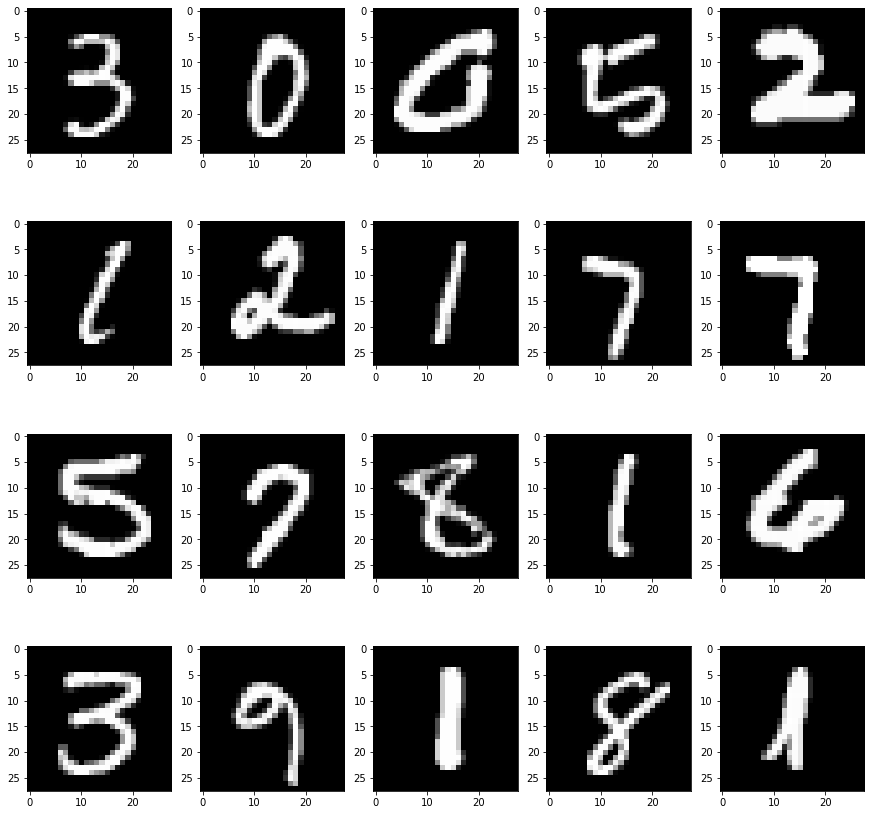

In [6]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    loc = random.randint(0,len(X)-1)
    plt.imshow(X[loc],cmap = 'gray')
plt.show()

In [7]:
X = X.reshape(-1,28,28,1)

In [8]:
Xtrain, xval, Ytrain, yval = train_test_split(X,Y,test_size = 0.22)

In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',
                              activation = 'relu',input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 64,kernel_size = (5,5),
                              activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),strides = (1,1),padding = 'same'))

model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu',padding = 'same'))
model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),
                             activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2),padding = 'same'))

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation = 'softmax'))

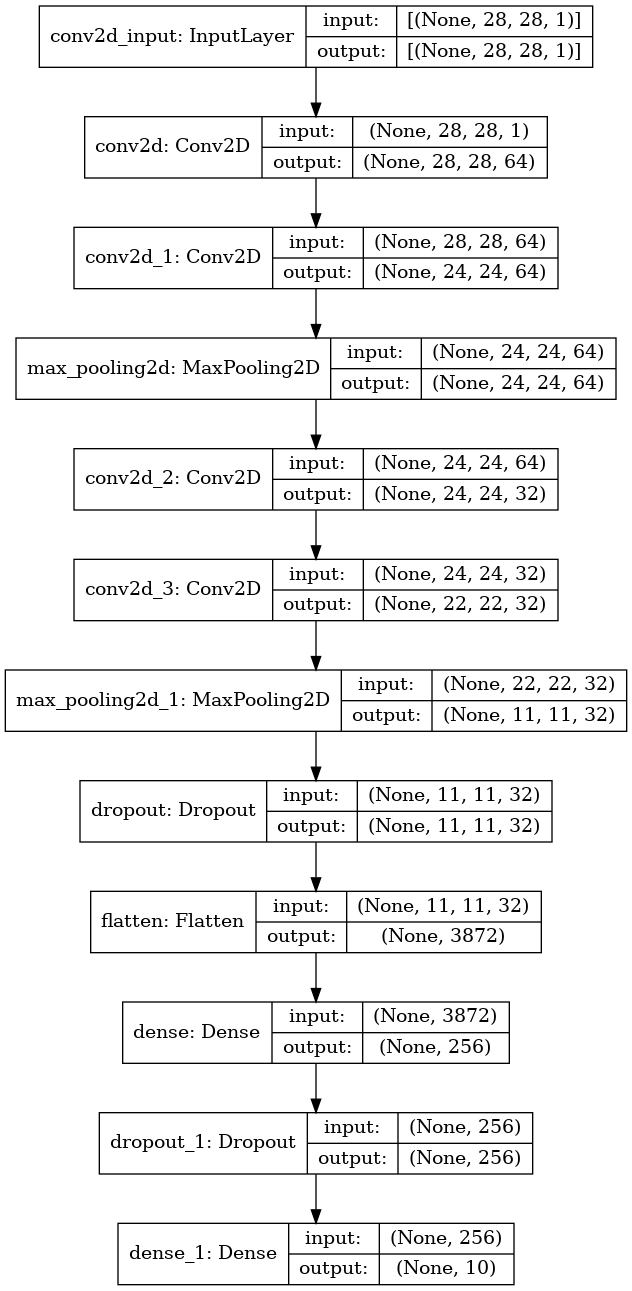

In [10]:
keras.utils.plot_model(model,to_file = 'model.png',show_shapes = True)

In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [12]:
history = model.fit(Xtrain, Ytrain, epochs = 5, batch_size = 32, validation_data = (xval, yval))

Epoch 1/5
1024/1024 [==============================] - 211s 205ms/step - loss: 0.1890 - accuracy: 0.9408 - val_loss: 0.0505 - val_accuracy: 0.9856
Epoch 2/5
1024/1024 [==============================] - 238s 232ms/step - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.0476 - val_accuracy: 0.9869
Epoch 3/5
1024/1024 [==============================] - 203s 198ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 4/5
1024/1024 [==============================] - 203s 199ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 5/5
1024/1024 [==============================] - 206s 202ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0503 - val_accuracy: 0.9857


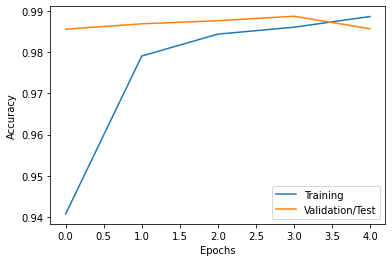

In [13]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc,label = "Training")
plt.plot(val_acc,label = 'Validation/Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

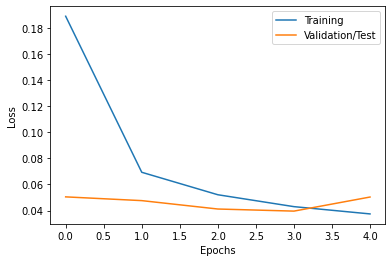

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label = 'Training')
plt.plot(val_loss,label = 'Validation/Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()